In [1]:
#Imports & Data Connection
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

In [4]:
#pull data of Apple from yahoo
data = web.DataReader("AAPL", "yahoo")
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-06,43.747501,42.930000,43.092499,43.562500,140105200.0,41.343655
2017-11-07,43.812500,43.400002,43.477501,43.702499,97446000.0,41.476536
2017-11-08,44.060001,43.582500,43.665001,44.060001,97638000.0,41.815819
2017-11-09,44.025002,43.285000,43.777500,43.970001,117930400.0,41.730400
2017-11-10,43.845001,43.567501,43.777500,43.667500,100582000.0,41.592289
...,...,...,...,...,...,...
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.800003
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.740005
2022-10-31,154.240005,151.919998,153.160004,153.339996,97943200.0,153.339996


Simple Moving Average

In [5]:
data['SMA_100'] = ta.SMA(data['Close'], 100)
data.iloc[100:]

,High,Low,Open,Close,Volume,Adj Close,SMA_100
Date,,,,,,,
2018-04-03,42.187500,41.220001,41.910000,42.097500,121112000.0,40.260391,43.038375
2018-04-04,43.002499,41.192501,41.220001,42.902500,138422000.0,41.030258,43.030375
2018-04-05,43.557499,43.020000,43.145000,43.200001,107732800.0,41.314777,43.021775
2018-04-06,43.119999,42.049999,42.742500,42.095001,140021200.0,40.257996,43.003025
2018-04-09,43.272499,42.462502,42.470001,42.512501,116070800.0,40.657280,42.991475
...,...,...,...,...,...,...,...
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.800003,151.253600
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.740005,151.323900
2022-10-31,154.240005,151.919998,153.160004,153.339996,97943200.0,153.339996,151.377700


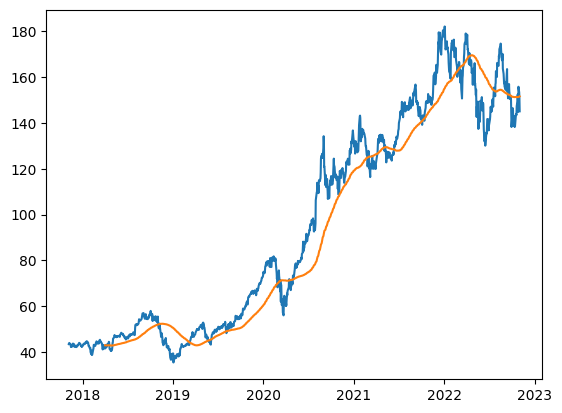

In [6]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

Exponential Moving Average

In [7]:
data['EMA_100'] = ta.EMA(data['Close'], 100)

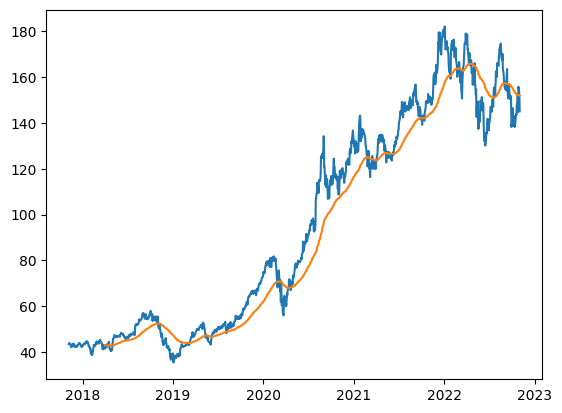

In [8]:
plt.plot(data['Close'])
plt.plot(data['EMA_100'])

Relative Strength Index

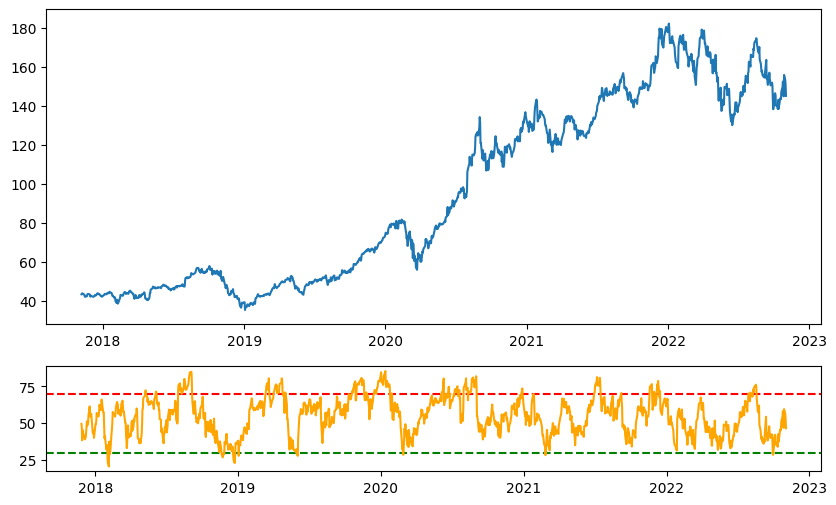

In [10]:
data['RSI'] = ta.RSI(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw = {"height_ratios": [3, 1]}, figsize =(10,6))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(data['RSI'], color="orange")

Linear Regression

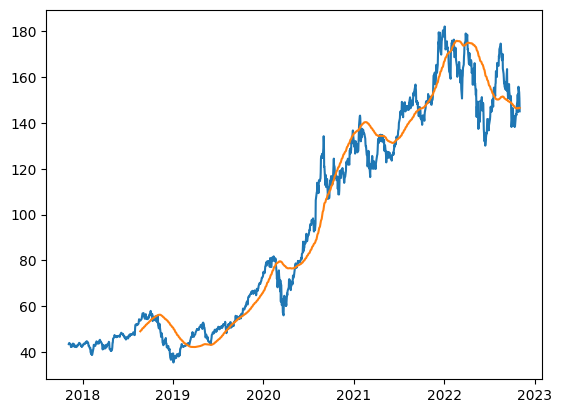

In [13]:
data['LINEARREG'] = ta.LINEARREG(data['Close'], 200)
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

Moving Average Covergence Divergence

<BarContainer object of 1257 artists>

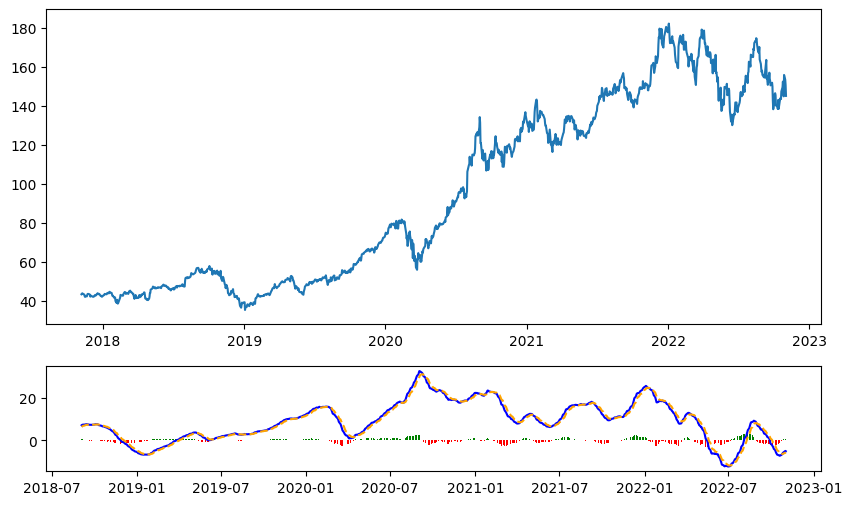

In [21]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

data = web.DataReader("AAPL", "yahoo", start, end)
macd, macd_signal, macd_hist = ta.MACD(data['Close'], 200)


fig, axs = plt.subplots(2, 1, gridspec_kw = {"height_ratios": [3, 1]}, figsize =(10,6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--', color = "orange")
axs[1].bar(macd_hist.index, macd_hist, color = c)

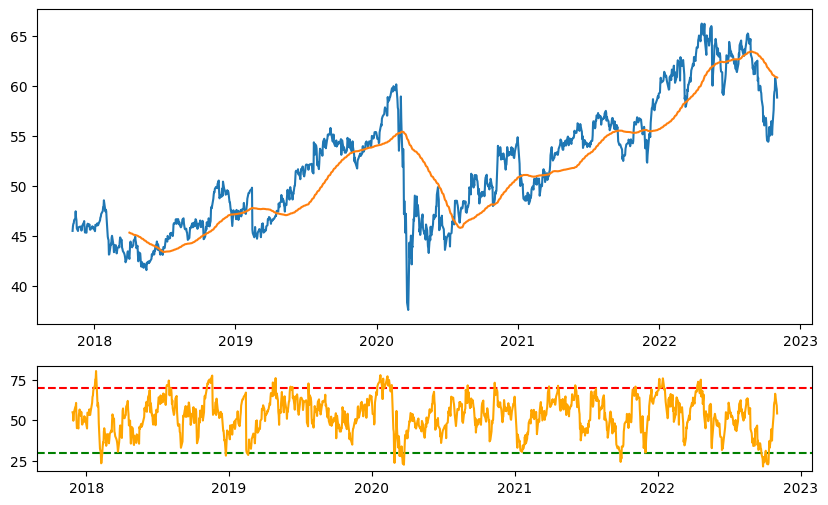

In [29]:
v

In [ ]:
#RSI ANALYSIS OF COCA COLA
dKO = web.DataReader("O", "yahoo")
dKO

dKO['SMA_100'] = ta.SMA(dKO['Close'], 100)
dKO.iloc[100:]
dKO['RSI'] = ta.RSI(dKO['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw = {"height_ratios": [3, 1]}, figsize =(10,6))

axs[0].plot(dKO['Close'])
axs[0].plot(dKO['SMA_100'])
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(dKO['RSI'], color="orange")

: 